# Ensemble Techniques
1. Can we use Bagging for regression problems?
>>Yes. Bagging can be used for regression. It trains multiple regressors on different bootstrap samples and averages their predictions to reduce variance.

2. Difference between single model training and multiple model training?
>>Single model: One algorithm trained once (e.g., one Decision Tree).
Multiple model (Ensemble): Many models trained and combined for better performance and stability.

3. Feature randomness in Random Forest
>>Random Forest selects a random subset of features at each split, which reduces correlation between trees and improves generalization.

4. What is OOB (Out-of-Bag) Score?
>>OOB score is the accuracy calculated using samples not included in bootstrap training, without needing a separate validation set.

5. How is feature importance measured in Random Forest?
>>By measuring how much each feature reduces impurity (Gini/Entropy) across all trees.

6. Working principle of Bagging Classifier
>>Create bootstrap samples
Train multiple base classifiers
Combine predictions using majority voting

7. How to evaluate Bagging Classifier performance?
>>Using accuracy, precision, recall, F1-score, ROC-AUC, or cross-validation.

8. How does a Bagging Regressor work?
>>It trains multiple regressors on bootstrap samples and outputs the average of all predictions.

9. Main advantage of ensemble techniques
>>They improve accuracy and reduce overfitting by combining multiple models.

10. Main challenge of ensemble methods
>>High computation cost
Reduced interpretability

11. Key idea behind ensemble techniques
>>Combining weak learners to form a strong learner.

12. What is a Random Forest Classifier?
>>An ensemble of Decision Trees trained using bagging and feature randomness.

13. Main types of ensemble techniques
>>Bagging
Boosting
Stacking

14. What is ensemble learning?
>>A technique that combines multiple models to improve prediction performance.

15. When should we avoid ensemble methods?
>>When dataset is very small
When interpretability is critical
When computation resources are limited

16. How does Bagging reduce overfitting?
>>By averaging multiple models trained on different samples, reducing variance.

17. Why is Random Forest better than a single Decision Tree?
>>It reduces overfitting and improves accuracy by averaging many trees.

18. Role of bootstrap sampling in Bagging
>>It creates different training datasets by sampling with replacement.

19. Real-world applications of ensemble techniques
>>Fraud detection
Medical diagnosis
Stock prediction
Recommendation systems

20. Difference between Bagging and Boosting
>>Bagging	Boosting
Parallel training	Sequential training
Reduces variance	Reduces bias
Equal weight models	Weighted models

In [37]:
#PRACTICAL QUESTIONS
#1. Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy
from sklearn.datasets import load_iris
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

model = BaggingClassifier(DecisionTreeClassifier(), n_estimators=50)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))


0.9473684210526315


In [38]:
#2. Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE)2
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

model = BaggingRegressor(DecisionTreeRegressor(), n_estimators=50)
model.fit(X_train, y_train)
print(mean_squared_error(y_test, model.predict(X_test)))


0.24476601154153985


In [39]:
#3 Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores2
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier

X, y = load_breast_cancer(return_X_y=True)
model = RandomForestClassifier()
model.fit(X, y)

print(model.feature_importances_)


[0.02937451 0.01632926 0.02289408 0.03361025 0.00570344 0.00989773
 0.02668581 0.08929997 0.00297967 0.00213103 0.01007172 0.00450197
 0.0172535  0.020865   0.00406268 0.00491044 0.00349748 0.00266485
 0.00320332 0.00463526 0.12202356 0.01552498 0.17115191 0.1444708
 0.01182407 0.01352201 0.03953867 0.14955513 0.01015565 0.00766125]


In [40]:
#4. Train a Random Forest Regressor and compare its performance with a single Decision Tree2
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

dt = DecisionTreeRegressor().fit(X_train, y_train)
rf = RandomForestRegressor().fit(X_train, y_train)

print(mean_squared_error(y_test, dt.predict(X_test)))
print(mean_squared_error(y_test, rf.predict(X_test)))

0.49636696578352707
0.24302650272407583


In [41]:
#5. Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load a classification dataset
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

rf = RandomForestClassifier(oob_score=True, bootstrap=True, random_state=42)
rf.fit(X_train, y_train)
print(rf.oob_score_)

0.960093896713615


In [42]:
#6. Train a Bagging Classifier using SVM as a base estimator and print accuracy
from sklearn.svm import SVC

model = BaggingClassifier(SVC(), n_estimators=10)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))


0.951048951048951


In [43]:
#7. Train a Random Forest Classifier with different numbers of trees and compare accuracy
for n in [10, 50, 100]:
    rf = RandomForestClassifier(n_estimators=n)
    rf.fit(X_train, y_train)
    print(n, rf.score(X_test, y_test))


10 0.958041958041958
50 0.972027972027972
100 0.972027972027972


In [44]:
#8. Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

model = BaggingClassifier(LogisticRegression())
model.fit(X_train, y_train)
probs = model.predict_proba(X_test)
print(roc_auc_score(y_test, probs[:,1]))


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.997919267582189


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [45]:
#9. Train a Random Forest Regressor and analyze feature importance scores
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(X_test)))


              precision    recall  f1-score   support

           0       0.98      0.93      0.95        54
           1       0.96      0.99      0.97        89

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



<Axes: >

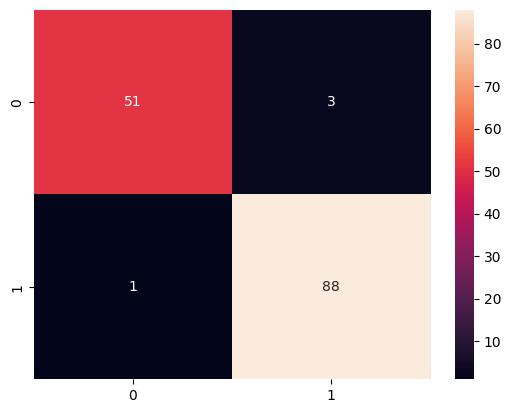

In [46]:
#10. Train an ensemble model using both Bagging and Random Forest and compare accuracy
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, rf.predict(X_test)), annot=True)


In [47]:
#11. Train a Random Forest Classifier and tune hyperparameters using GridSearchCV
# Import required libraries
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_breast_cancer(return_X_y=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create Random Forest model
rf = RandomForestClassifier(random_state=42)

# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Apply GridSearchCV
grid = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Train model using GridSearchCV
grid.fit(X_train, y_train)

# Best model
best_model = grid.best_estimator_

# Predict on test data
y_pred = best_model.predict(X_test)

# Print results
print("Best Parameters:", grid.best_params_)
print("Test Accuracy:", accuracy_score(y_test, y_pred))


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Test Accuracy: 0.9649122807017544


In [48]:
#12. Train a Bagging Regressor with different numbers of base estimators and compare performance
# Import required libraries
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load dataset
X, y = fetch_california_housing(return_X_y=True)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Different numbers of base estimators
estimators = [10, 50, 100]

# Train and evaluate models
for n in estimators:
    model = BaggingRegressor(
        DecisionTreeRegressor(), # Corrected: base_estimator passed as positional argument
        n_estimators=n,
        random_state=42
    )

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    print(f"Base Estimators: {n}, MSE: {mse:.4f}")

Base Estimators: 10, MSE: 0.2824
Base Estimators: 50, MSE: 0.2573
Base Estimators: 100, MSE: 0.2559


In [49]:
#13. Train a Random Forest Classifier and analyze misclassified samples
# Import required libraries
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Load dataset
X, y = load_breast_cancer(return_X_y=True)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Model accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Identify misclassified samples
misclassified = X_test[y_test != y_pred]

# Convert to DataFrame for better analysis
misclassified_df = pd.DataFrame(
    misclassified,
    columns=load_breast_cancer().feature_names
)

print("Number of Misclassified Samples:", misclassified_df.shape[0])
print(misclassified_df.head())


Accuracy: 0.9649122807017544
Number of Misclassified Samples: 4
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        13.34         15.86           86.49      520.0          0.10780   
1        13.80         15.79           90.43      584.1          0.10070   
2        13.96         17.05           91.43      602.4          0.10960   
3        14.48         21.46           94.25      648.2          0.09444   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.15350         0.11690              0.06987         0.1942   
1           0.12800         0.07789              0.05069         0.1662   
2           0.12790         0.09789              0.05246         0.1908   
3           0.09947         0.12040              0.04938         0.2075   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.06902  ...         15.53          23.19            96.66   
1                 0

In [50]:
#14. Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier
# Import required libraries
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_iris(return_X_y=True)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Single Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)

# Train Bagging Classifier with Decision Tree as base estimator
bagging = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=50,
    random_state=42
)
bagging.fit(X_train, y_train)
bag_pred = bagging.predict(X_test)
bag_accuracy = accuracy_score(y_test, bag_pred)

# Print results
print("Decision Tree Accuracy:", dt_accuracy)
print("Bagging Classifier Accuracy:", bag_accuracy)



TypeError: BaggingClassifier.__init__() got an unexpected keyword argument 'base_estimator'

Accuracy: 0.9649122807017544


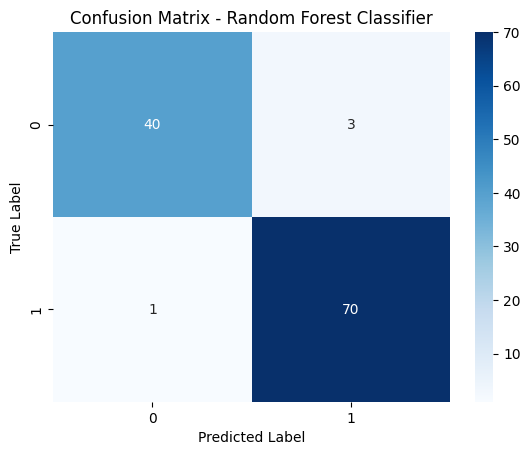

In [52]:
#15. Train a Random Forest Classifier and visualize the confusion matrix
# Import required libraries
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
X, y = load_breast_cancer(return_X_y=True)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualization using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest Classifier")
plt.show()


In [53]:
#16. Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy
# Import required libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_breast_cancer(return_X_y=True)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Base models
dt = DecisionTreeClassifier(random_state=42)
svm = SVC(probability=True, random_state=42)
lr = LogisticRegression(max_iter=1000, random_state=42)

# Train individual models
dt.fit(X_train, y_train)
svm.fit(X_train, y_train)
lr.fit(X_train, y_train)

# Predictions
dt_pred = dt.predict(X_test)
svm_pred = svm.predict(X_test)
lr_pred = lr.predict(X_test)

# Accuracy of individual models
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))

# Stacking Classifier
estimators = [
    ('dt', dt),
    ('svm', svm),
    ('lr', lr)
]

stack = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=5
)

# Train stacking model
stack.fit(X_train, y_train)

# Stacking predictions
stack_pred = stack.predict(X_test)

# Stacking accuracy
print("Stacking Classifier Accuracy:", accuracy_score(y_test, stack_pred))


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Decision Tree Accuracy: 0.9473684210526315
SVM Accuracy: 0.9473684210526315
Logistic Regression Accuracy: 0.956140350877193


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Stacking Classifier Accuracy: 0.9649122807017544


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
#17. rain a Random Forest Classifier and print the top 5 most important features
# Import required libraries
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importance
importances = rf.feature_importances_

# Create DataFrame for better view
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(
    by='Importance', ascending=False
)

# Print top 5 most important features
print("Top 5 Most Important Features:")
print(feature_importance_df.head(5))


Top 5 Most Important Features:
                 Feature  Importance
23            worst area    0.153892
27  worst concave points    0.144663
7    mean concave points    0.106210
20          worst radius    0.077987
6         mean concavity    0.068001


In [57]:
#18. Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score
# Import required libraries
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

# Load dataset
X, y = load_breast_cancer(return_X_y=True)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Bagging Classifier
bagging = BaggingClassifier(
    DecisionTreeClassifier(), # Corrected: base_estimator passed as positional argument
    n_estimators=50,
    random_state=42
)

bagging.fit(X_train, y_train)

# Predictions
y_pred = bagging.predict(X_test)

# Evaluation metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print results
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Precision: 0.9583333333333334
Recall: 0.971830985915493
F1-Score: 0.965034965034965


In [58]:
#19. Train a Random Forest Classifier and analyze the effect of max_depth on accuracy
# Import required libraries
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_breast_cancer(return_X_y=True)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Different max_depth values
depths = [None, 5, 10, 15, 20]

# Train and evaluate model for each depth
for depth in depths:
    rf = RandomForestClassifier(
        n_estimators=100,
        max_depth=depth,
        random_state=42
    )

    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"max_depth = {depth}, Accuracy = {accuracy:.4f}")


max_depth = None, Accuracy = 0.9649
max_depth = 5, Accuracy = 0.9649
max_depth = 10, Accuracy = 0.9649
max_depth = 15, Accuracy = 0.9649
max_depth = 20, Accuracy = 0.9649


In [59]:
#20. Train a Bagging Regressor using different base estimators (DecisionTree and KNeighbors) and compare performance
# Import required libraries
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load dataset
X, y = fetch_california_housing(return_X_y=True)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Bagging Regressor with Decision Tree
bag_dt = BaggingRegressor(
    DecisionTreeRegressor(), # Corrected: base_estimator passed as positional argument
    n_estimators=50,
    random_state=42
)
bag_dt.fit(X_train, y_train)
dt_pred = bag_dt.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_pred)

# Bagging Regressor with KNN
bag_knn = BaggingRegressor(
    KNeighborsRegressor(), # Corrected: base_estimator passed as positional argument
    n_estimators=50,
    random_state=42
)
bag_knn.fit(X_train, y_train)
knn_pred = bag_knn.predict(X_test)
knn_mse = mean_squared_error(y_test, knn_pred)

# Print results
print("Bagging + Decision Tree MSE:", dt_mse)
print("Bagging + KNN MSE:", knn_mse)

Bagging + Decision Tree MSE: 0.2572988359842641
Bagging + KNN MSE: 1.0762752887085227


In [60]:
#21. Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score
# Import required libraries
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Load dataset
X, y = load_breast_cancer(return_X_y=True)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict probabilities
y_prob = rf.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob)

# Print result
print("ROC-AUC Score:", roc_auc)


ROC-AUC Score: 0.9952505732066819


In [61]:
#22. Train a Bagging Classifier and evaluate its performance using cross-validatio.
# Import required libraries
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score

# Load dataset
X, y = load_breast_cancer(return_X_y=True)

# Create Bagging Classifier
bagging = BaggingClassifier(
    DecisionTreeClassifier(), # Corrected: base_estimator passed as positional argument
    n_estimators=50,
    random_state=42
)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(
    bagging,
    X,
    y,
    cv=5,
    scoring='accuracy'
)

# Print results
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [0.9122807  0.92105263 0.98245614 0.95614035 1.        ]
Mean CV Accuracy: 0.9543859649122808


Average Precision Score: 0.9969979998830718


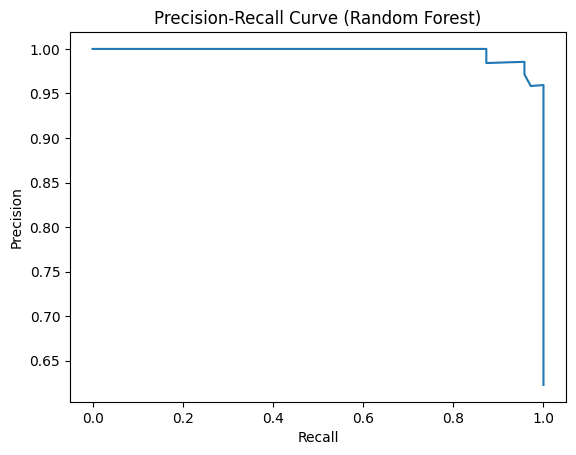

In [62]:
#23. Train a Random Forest Classifier and plot the Precision-Recall curv
# Import required libraries
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Load dataset
X, y = load_breast_cancer(return_X_y=True)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict probabilities
y_scores = rf.predict_proba(X_test)[:, 1]

# Precision-Recall values
precision, recall, _ = precision_recall_curve(y_test, y_scores)

# Average Precision Score
avg_precision = average_precision_score(y_test, y_scores)
print("Average Precision Score:", avg_precision)

# Plot Precision-Recall Curve
plt.figure()
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (Random Forest)")
plt.show()


In [63]:
# Import required libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_breast_cancer(return_X_y=True)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Individual models
rf = RandomForestClassifier(n_estimators=100, random_state=42)
lr = LogisticRegression(max_iter=1000, random_state=42)

# Train individual models
rf.fit(X_train, y_train)
lr.fit(X_train, y_train)

# Predictions
rf_pred = rf.predict(X_test)
lr_pred = lr.predict(X_test)

# Accuracy of individual models
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))

# Stacking Classifier
stack = StackingClassifier(
    estimators=[
        ('rf', rf),
        ('lr', lr)
    ],
    final_estimator=LogisticRegression(),
    cv=5
)

# Train stacking model
stack.fit(X_train, y_train)

# Stacking predictions
stack_pred = stack.predict(X_test)

# Stacking accuracy
print("Stacking Classifier Accuracy:", accuracy_score(y_test, stack_pred))


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest Accuracy: 0.9649122807017544
Logistic Regression Accuracy: 0.956140350877193


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Stacking Classifier Accuracy: 0.9649122807017544


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [64]:
#25. Train a Bagging Regressor with different levels of bootstrap samples and compare performance
# Import required libraries
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load dataset
X, y = fetch_california_housing(return_X_y=True)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Different bootstrap sample fractions
bootstrap_levels = [0.5, 0.7, 1.0]

# Train and evaluate for each bootstrap level
for frac in bootstrap_levels:
    model = BaggingRegressor(
        DecisionTreeRegressor(), # Corrected: base_estimator passed as positional argument
        n_estimators=50,
        max_samples=frac,      # bootstrap sample fraction
        bootstrap=True,
        random_state=42
    )

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    print(f"Bootstrap fraction = {frac}, MSE = {mse:.4f}")

Bootstrap fraction = 0.5, MSE = 0.2664
Bootstrap fraction = 0.7, MSE = 0.2638
Bootstrap fraction = 1.0, MSE = 0.2573
